In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Q1. Perform basic EDA

In [2]:
df=pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [9]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [88]:
df.isnull().sum()

location              0
size                  0
total_sqft            0
bath                  0
price                 0
bhk                   0
price_per_sqft        0
z_score               0
price_per_sqft_log    0
dtype: int64

In [92]:
df.nunique()

location               241
size                    31
total_sqft            1972
bath                    19
price                 1952
bhk                     19
price_per_sqft        4951
z_score               4951
price_per_sqft_log    4951
dtype: int64

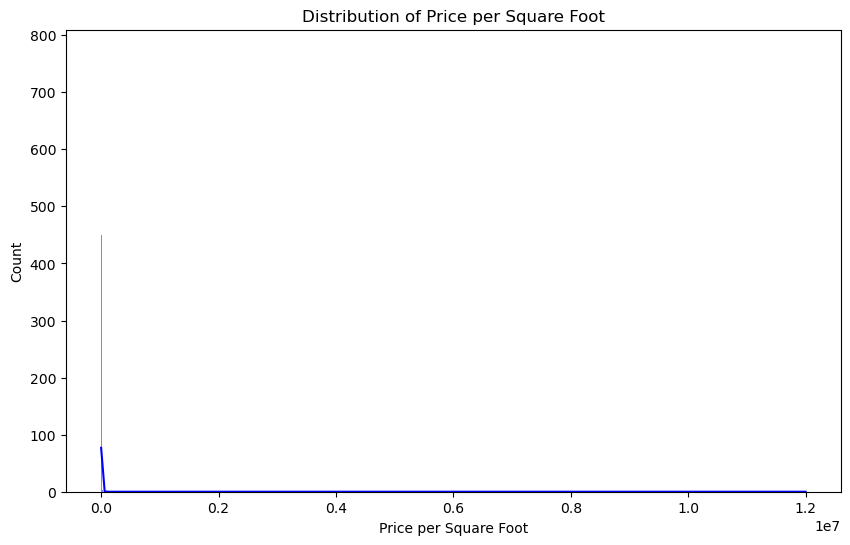

In [16]:
# Price per Square Foot Distribution
plt.figure(figsize=(10,6))
# df.plot(kind='line',title='Distribution of Price per Square Foot')
sns.histplot(df['price_per_sqft'], kde=True, color='blue')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Count')
plt.show()

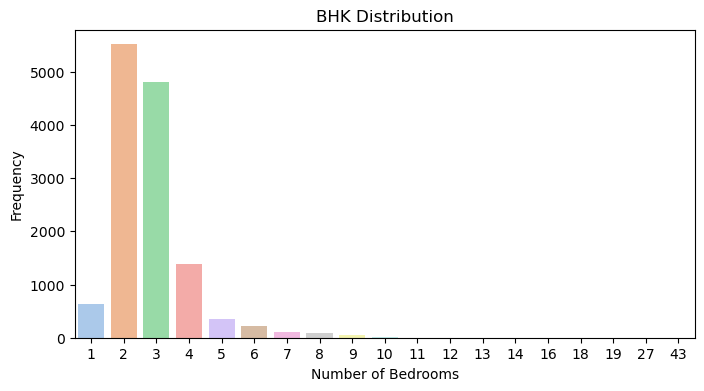

In [18]:
# Size (BHK) Analysis
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='bhk', palette='pastel',hue='bhk',legend=False)
plt.title('BHK Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

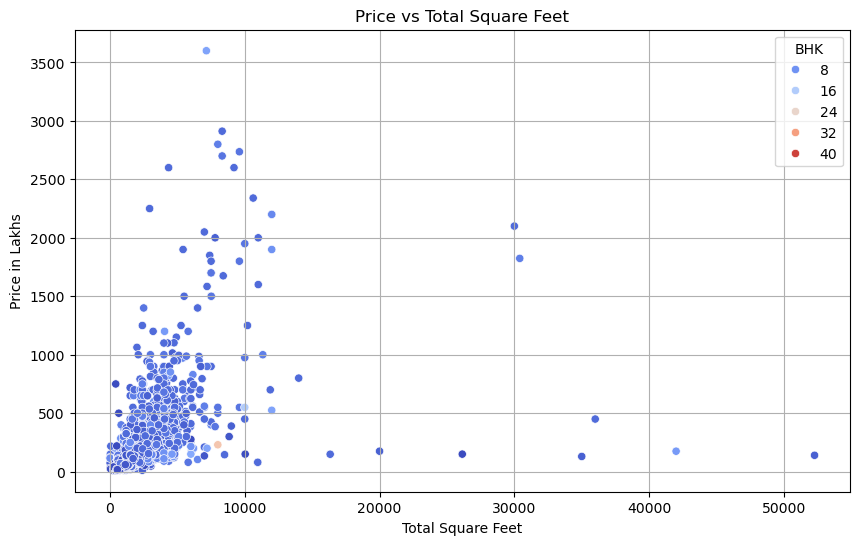

In [20]:
# Total Squarefeet vs Price - Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='total_sqft',y='price',hue='bhk',palette='coolwarm')
plt.xlabel('Total Square Feet')
plt.ylabel('Price in Lakhs')
plt.title('Price vs Total Square Feet')
plt.legend(title='BHK')
plt.grid(True)
plt.show()

In [22]:
# Average Price per Sqft by Location
avg_price_per_sqft1=df.groupby('location')['price_per_sqft'].mean().reset_index()
avg_price_per_sqft1.columns=['location', 'avg_price_per_sqft'] 
print('\n Average Price per Square Foot by Location:')
print(avg_price_per_sqft1)


 Average Price per Square Foot by Location:
                      location  avg_price_per_sqft
0          1st Block Jayanagar        11495.857143
1           1st Phase JP Nagar        10154.000000
2    2nd Phase Judicial Layout         4048.545455
3         2nd Stage Nagarbhavi        17348.958333
4         5th Block Hbr Layout        12137.083333
..                         ...                 ...
236                  Yelahanka         5394.600000
237         Yelahanka New Town         5755.850000
238                Yelenahalli         4012.307692
239               Yeshwanthpur         6980.623529
240                      other         9413.722493

[241 rows x 2 columns]


In [24]:
# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
#      a) Mean and Standard deviation
#      b)Percentile method
#      c) IQR(Inter quartile range method) 
#      d) Z Score method 

lower_limit: -312261.1442419011
upper_limit: 328101.8177267496
Outliers using Mean and Std Dev:
             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333
data length before trimming: 13200
data length after trimming: 13195
No: of outliers: 5


<Axes: ylabel='price_per_sqft'>

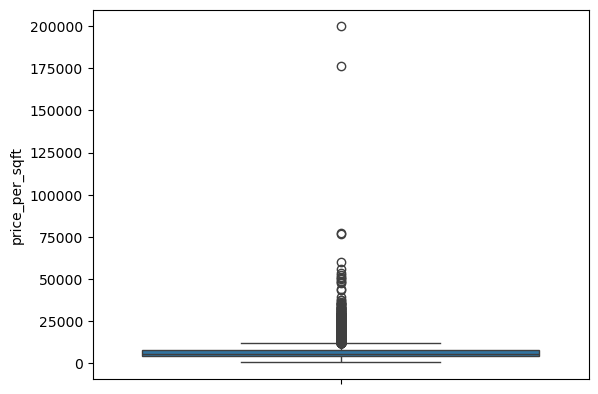

In [40]:
# Mean and Standard deviation
mean= df['price_per_sqft'].mean()
std_dev=df['price_per_sqft'].std()
lower_limit=mean-(3*std_dev)
upper_limit=mean+(3*std_dev)
print('lower_limit:',lower_limit)
print('upper_limit:',upper_limit)

# Detect outliers
outliers=df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
print('Outliers using Mean and Std Dev:')
print(outliers)

# Remove outliers by trimming
df_trimmed=df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]
print('data length before trimming:',len(df))
print('data length after trimming:',len(df_trimmed))
print('No: of outliers:',len(df)-len(df_trimmed))

sns.boxplot(df_trimmed['price_per_sqft'])

lower percentile: 3107.8500000000004
upper percentile: 15312.099999999984
Outliers using Percentile Method:
               location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
20              Kengeri      1 BHK       600.0   1.0   15.0    1   
41       Sarjapur  Road      3 BHK      1254.0   3.0   38.0    3   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
...                 ...        ...         ...   ...    ...  ...   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   
13199      Doddathoguru      1 BHK       550.0   1.0   17.0    1   

       price_per_sqft  
7               18181  
9               36274  
20 

<Axes: ylabel='price_per_sqft'>

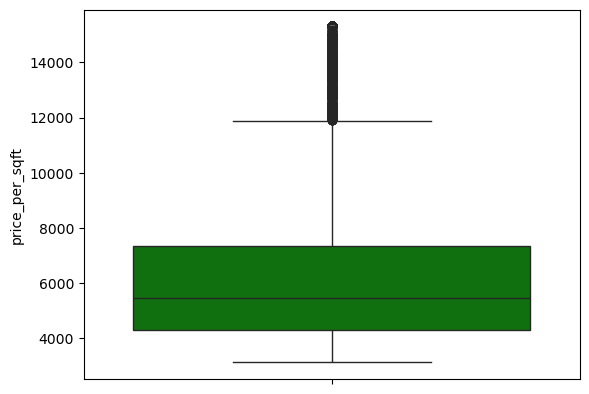

In [5]:
 # b)Percentile method
lower_percentile=df['price_per_sqft'].quantile(0.05)
upper_percentile=df['price_per_sqft'].quantile(0.95)
print('lower percentile:',lower_percentile)
print('upper percentile:',upper_percentile)

# Detect outliers
outliers = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]
print("Outliers using Percentile Method:")
print(outliers)

# Remove outliers by capping
df_capped = df.copy()
df_capped['price_per_sqft']=np.clip(df['price_per_sqft'],lower_percentile,upper_percentile)

sns.boxplot(df_capped['price_per_sqft'],color='g')

4267.0 7317.0 3050.0
lower limit: -308.0
upper limit: 11892.0
Outliers using IQR Method:
               location       size  total_sqft  bath  price  bhk  \
7          Rajaji Nagar      4 BHK      3300.0   4.0  600.0    4   
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
22          Thanisandra  4 Bedroom      2800.0   5.0  380.0    4   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
48             KR Puram  2 Bedroom       800.0   1.0  130.0    2   
...                 ...        ...         ...   ...    ...  ...   
13142             other      2 BHK      1140.0   1.0  185.0    2   
13157             other  7 Bedroom      1400.0   7.0  218.0    7   
13185          Hulimavu      1 BHK       500.0   1.0  220.0    1   
13186             other  4 Bedroom      1200.0   5.0  325.0    4   
13191  Ramamurthy Nagar  7 Bedroom      1500.0   9.0  250.0    7   

       price_per_sqft   z_score  
7               18181  0.096143  
9               36274  0.2

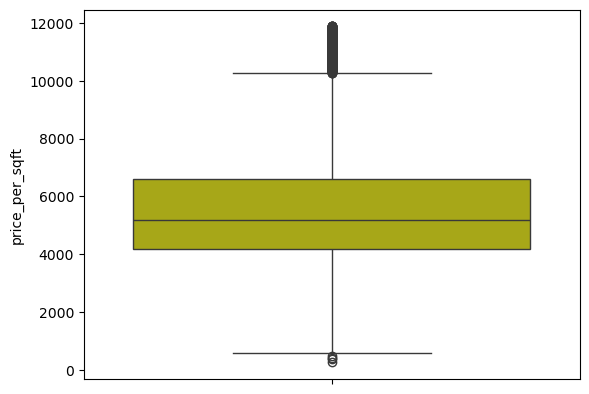

In [62]:
# IQR(Inter quartile range method) 
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
print('lower limit:',lower_limit)
print('upper limit:',upper_limit)

# Detect outliers
outliers = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
print("Outliers using IQR Method:")
print(outliers)

# Remove outliers by trimming
df_trimmed = df[(df["price_per_sqft"] >= lower_limit) & (df["price_per_sqft"] <= upper_limit)]
print('No: of outliers:',len(df)-len(df_trimmed))
sns.boxplot(df_trimmed['price_per_sqft'],color='y')

# Remove outliers by capping
df_capped = df.copy()
df_capped['price_per_sqft'] = np.clip(df_capped['price_per_sqft'], lower_limit, upper_limit)

<Axes: ylabel='price_per_sqft'>

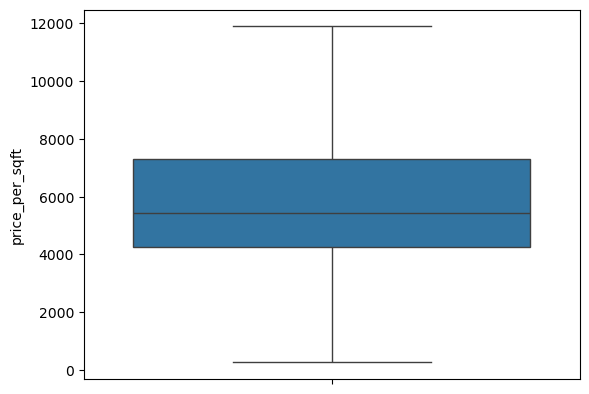

In [50]:
# After Capping
sns.boxplot(df_capped['price_per_sqft'])

Outliers using Z-Score Method:
             location       size  total_sqft  bath  price  bhk  \
345             other  3 Bedroom        11.0   3.0   74.0    3   
1106            other  5 Bedroom        24.0   2.0  150.0    5   
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4   
4924            other      7 BHK         5.0   7.0  115.0    7   
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4   

       price_per_sqft     z_score  
345            672727    6.229266  
1106           625000    5.782062  
4044         12000000  112.366280  
4924          2300000   21.476881  
11447          363333    3.330231  


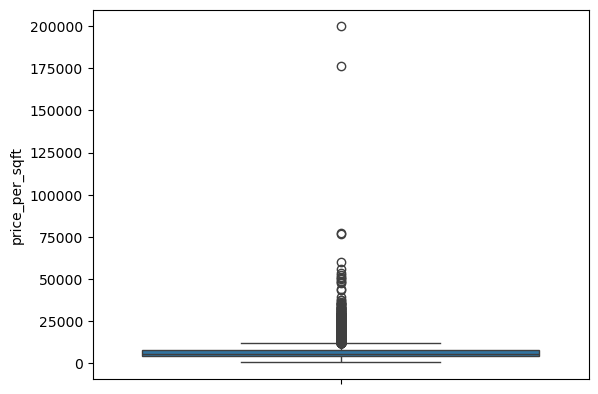

In [52]:
# Z Score method
# Dectecting outliers have Z-scores greater than 3 or less than -3.

from scipy.stats import zscore
df['z_score'] = zscore(df['price_per_sqft'])

# Detect outliers
outliers = df[(df["z_score"] > 3) | (df["z_score"] < -3)]
print("Outliers using Z-Score Method:")
print(outliers)

# Remove outliers by trimming
df_trimmed = df[(df["z_score"] <= 3) & (df["z_score"] >= -3)]
sns.boxplot(df_trimmed['price_per_sqft'])

# Remove outliers by capping
df_capped = df.copy()
df_capped['price_per_sqft'] = np.clip(df_capped['price_per_sqft'], lower_limit, upper_limit)


<Axes: ylabel='price_per_sqft'>

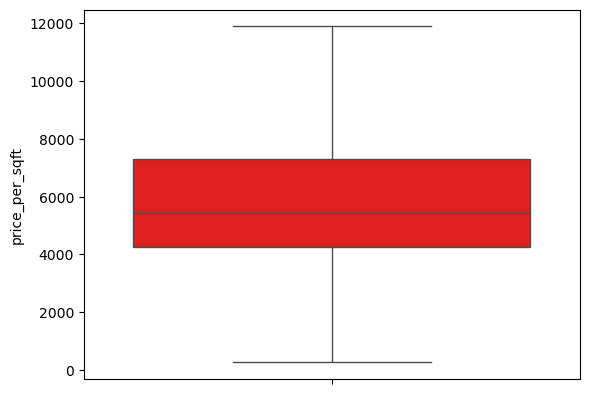

In [56]:
# After Capping
sns.boxplot(df_capped['price_per_sqft'],color='r')

In [64]:
# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation. 

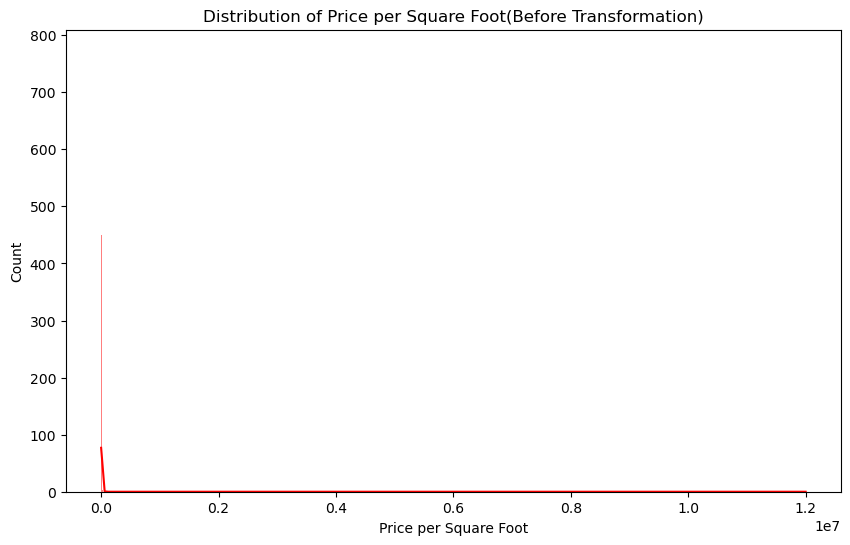

In [66]:
from scipy.stats import skew, kurtosis

# Plot Histogram to Check Normality
plt.figure(figsize=(10,6))
sns.histplot(df['price_per_sqft'], kde=True, color='red')
plt.title('Distribution of Price per Square Foot(Before Transformation)')
plt.xlabel('Price per Square Foot')
plt.ylabel('Count')
plt.show()

In [67]:
# Check Skewness and Kurtosis (Before Transformation)

original_skewness = skew(df['price_per_sqft'])
original_kurtosis = kurtosis(df['price_per_sqft'])
print(f'Skewness (Before Transformation): {original_skewness}')
print(f'Kurtosis (Before Transformation): {original_kurtosis}')

Skewness (Before Transformation): 108.26875024325159
Kurtosis (Before Transformation): 12090.633538860382


In [70]:
# Perform Log Transformation (if needed)
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])
df['price_per_sqft_log']

0        8.216088
1        8.437284
2        8.367765
3        8.739697
4        8.354910
           ...   
13195    8.808369
13196    9.315781
13197    8.567696
13198    9.250330
13199    8.036250
Name: price_per_sqft_log, Length: 13200, dtype: float64

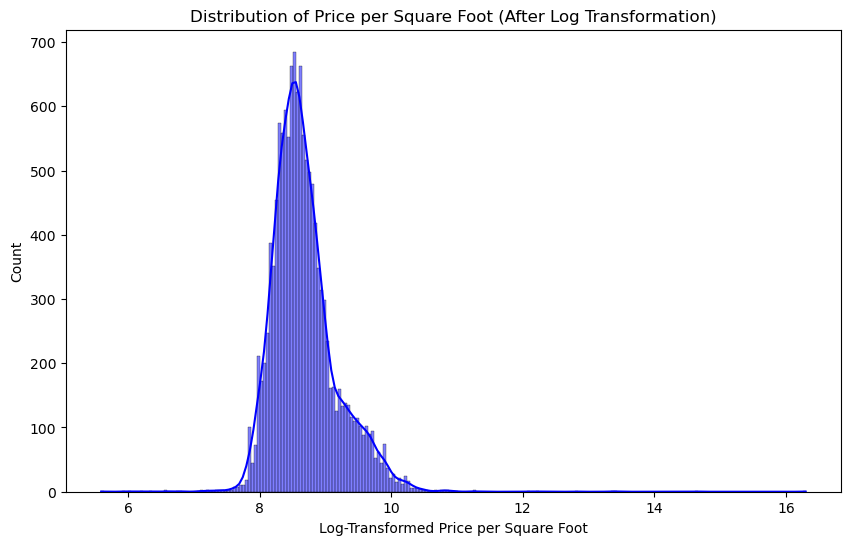

In [72]:
# Plot Histogram After Transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, color='blue')
plt.title('Distribution of Price per Square Foot (After Log Transformation)')
plt.xlabel('Log-Transformed Price per Square Foot')
plt.ylabel('Count')
plt.show()

In [74]:
# Check Skewness and Kurtosis (After Transformation)
transformed_skewness = skew(df['price_per_sqft_log'])
transformed_kurtosis = kurtosis(df['price_per_sqft_log'])
print(f'Skewness (After Transformation): {transformed_skewness}')
print(f'Kurtosis (After Transformation): {transformed_kurtosis}')

Skewness (After Transformation): 1.4003259019533636
Kurtosis (After Transformation): 9.203000543610957


In [ ]:
# Q5. Check the correlation between all the numerical columns and plot heatmap.

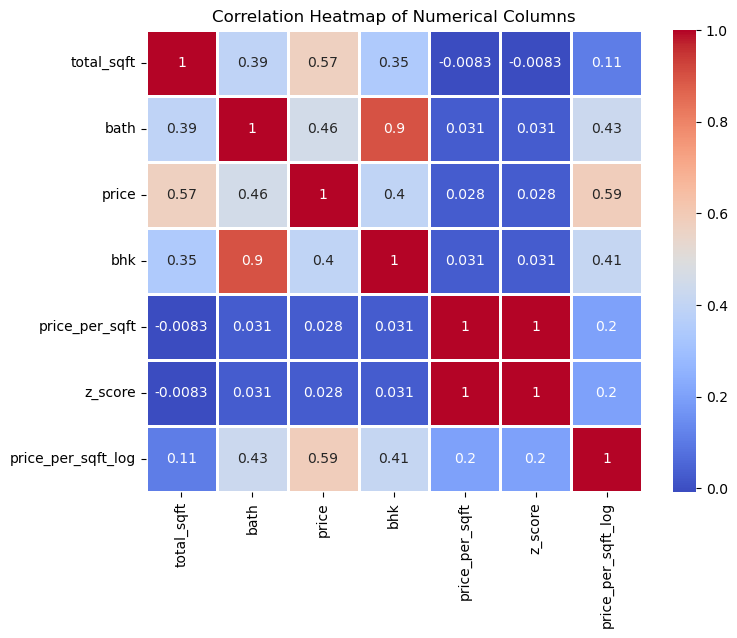

In [76]:
df.corr(numeric_only=True)

# Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',linewidths=0.8)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [78]:
# Q6. Draw Scatter plot between the variables to check the correlation between them. 

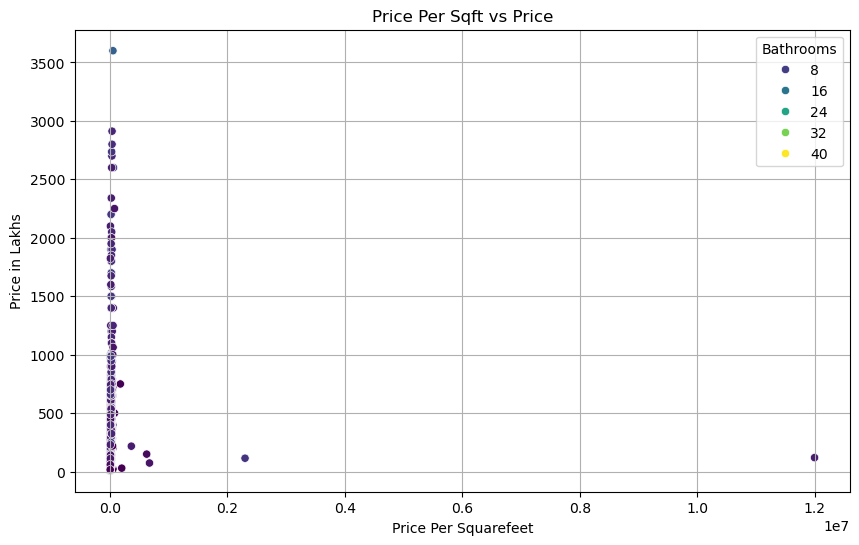

In [80]:
# Scatterplot Between Price Per Sqft and Price

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='price_per_sqft',y='price',hue='bath',palette='viridis')
plt.xlabel('Price Per Squarefeet')
plt.ylabel('Price in Lakhs')
plt.title('Price Per Sqft vs Price')
plt.legend(title='Bathrooms')
plt.grid(True)
plt.show()

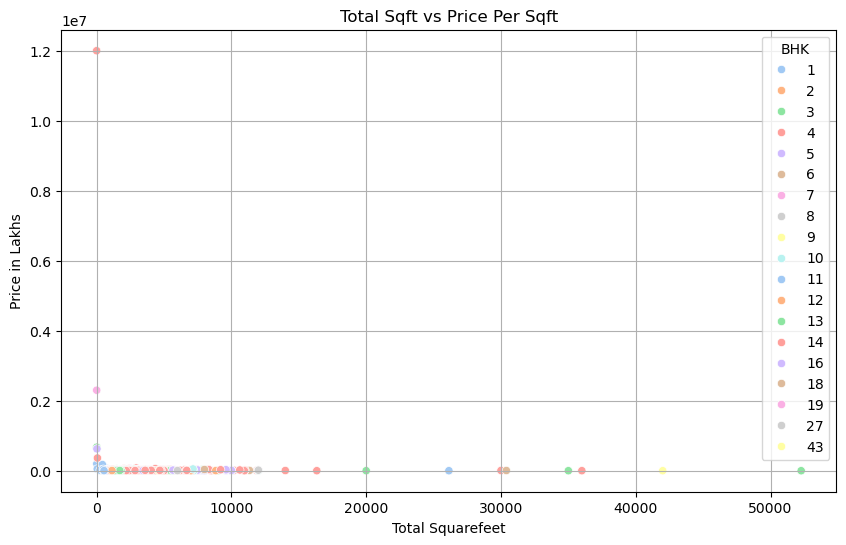

In [82]:
# Scatterplot Between Total Sqft and Price Per Sqft

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='total_sqft',y='price_per_sqft',hue='bhk',palette='pastel')
plt.xlabel('Total Squarefeet')
plt.ylabel('Price in Lakhs')
plt.title('Total Sqft vs Price Per Sqft')
plt.legend(title='BHK')
plt.grid(True)
plt.show()